In [ ]:
import polars as pl
import pandas as pd
import numpy as np
import pyarrow
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
from sklearn.metrics import r2_score
tsv_path= "/content/dados (1).csv"
data = pl.read_csv(tsv_path, separator=",", has_header=True)
data = data.to_pandas()
data = data.drop(data.columns[:1], axis=1)
data

,Gene_1,Gene_2,Gene_3,Phenotype
0,2,0,1,11.541357
1,0,1,1,-1.665888
2,2,0,2,8.601707
3,2,1,2,6.982366
4,0,1,1,-7.180035
...,...,...,...,...
195,1,1,0,2.415007
196,2,1,2,11.086641
197,2,2,0,7.239224
198,1,2,2,0.866024


In [ ]:
itens=data.columns
itens_filtrados = [item for item in itens if item.startswith('Gene_')]
itens_filtrados

['Gene_1', 'Gene_2', 'Gene_3']

Variavel: Gene_1
Correlação de Pearson: 0.81
Valor p: 0.00000
Correlação positiva forte e estatisticamente significativa.


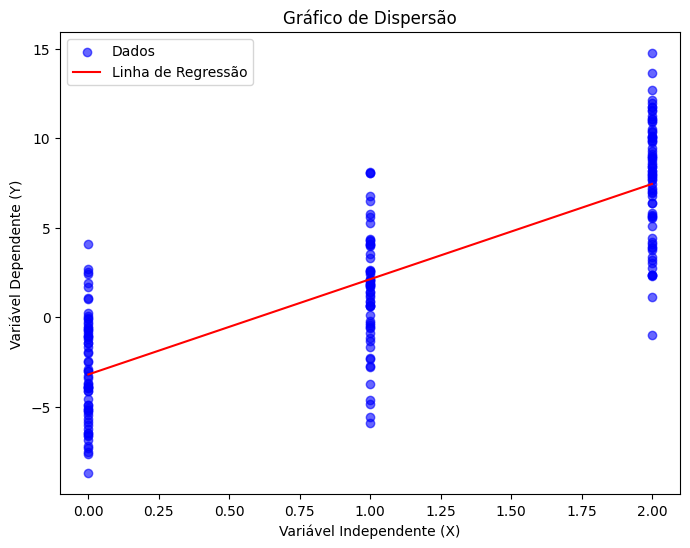

Variavel: Gene_2
Correlação de Pearson: -0.48
Valor p: 0.00000
Correlação negativa moderada e estatisticamente significativa.


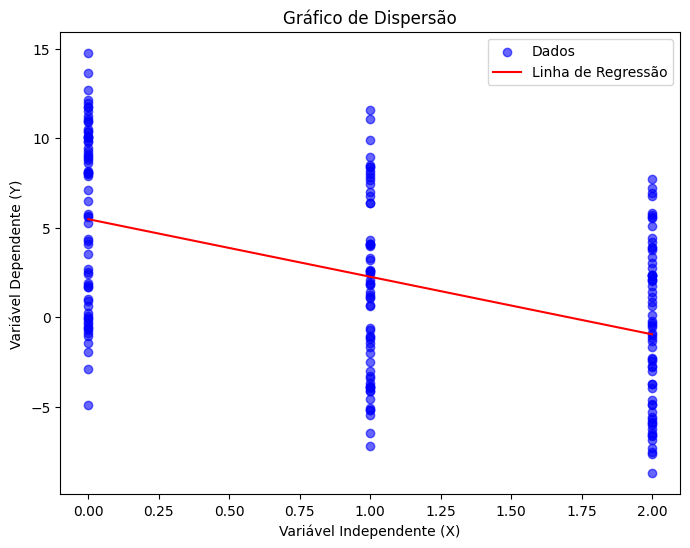

Variavel: Gene_3
Correlação de Pearson: 0.12
Valor p: 0.10264
Correlação fraca ou não significativa.


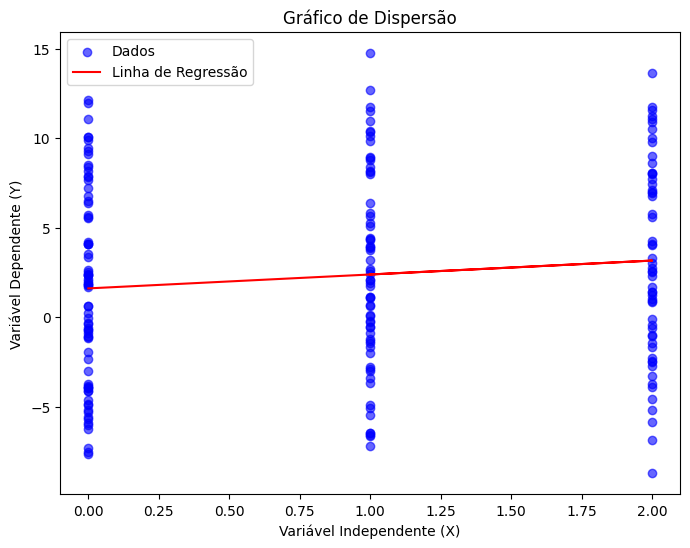

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

for i in range(0, 3):
    x = data.iloc[:, i].to_numpy()  # Variável independente
    y = data.iloc[:, 3].to_numpy()  # Variável dependente (coluna 3)
    nome=itens_filtrados[i]
    print(f'Variavel: {nome}')

   # Calcular a correlação de Pearson e o valor p
    corr, p_value = pearsonr(x, y)

    # Exibindo o valor da correlação e do p-value
    print(f"Correlação de Pearson: {corr:.2f}")
    print(f"Valor p: {p_value:.5f}")

    # Analisando a correlação com base nos critérios estabelecidos
    if abs(corr) > 0.5 and p_value < 0.05:
        if corr > 0:
            print("Correlação positiva forte e estatisticamente significativa.")
        else:
            print("Correlação negativa forte e estatisticamente significativa.")
    elif abs(corr) > 0.3 and p_value < 0.05:
        if corr > 0:
            print("Correlação positiva moderada e estatisticamente significativa.")
        else:
            print("Correlação negativa moderada e estatisticamente significativa.")
    else:
        print("Correlação fraca ou não significativa.")
    # Visualizar os dados com um gráfico de dispersão
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Dados', alpha=0.6)
    plt.xlabel('Variável Independente (X)')
    plt.ylabel('Variável Dependente (Y)')
    plt.title('Gráfico de Dispersão')

    # Ajustar uma linha de regressão linear
    model = LinearRegression()
    x_reshape = x.reshape(-1, 1)  # Reformatando os dados para o modelo
    model.fit(x_reshape, y)
    y_pred = model.predict(x_reshape)

    # Adicionar a linha de regressão ao gráfico
    plt.plot(x, y_pred, color='red', label='Linha de Regressão')
    plt.legend()
    plt.show()

In [ ]:
# Separar as variáveis independentes (X) e dependente (y)
X = data[['Gene_1', 'Gene_2', 'Gene_3']]  # Variáveis independentes
y = data['Phenotype']  # Variável dependente

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                            OLS Regression Results                            
Dep. Variable:              Phenotype   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     360.8
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           6.16e-70
Time:                        17:48:42   Log-Likelihood:                -335.12
No. Observations:                 160   AIC:                             678.2
Df Residuals:                     156   BIC:                             690.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4184      0.361     -1.158      0.2

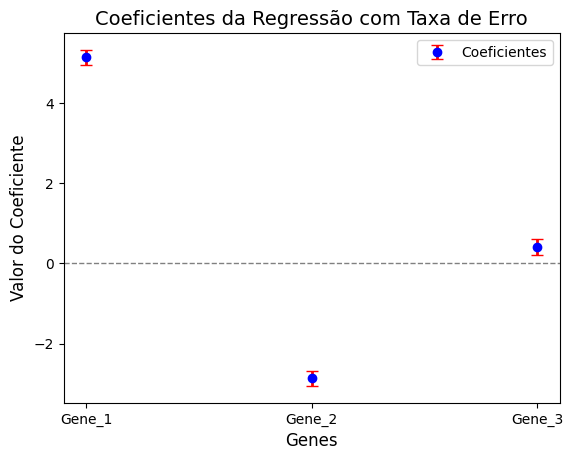

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Adicionar o intercepto (constante)
X_with_intercept = sm.add_constant(X_train)

# Ajustar o modelo OLS
modelo = sm.OLS(y_train, X_with_intercept).fit()

# Exibir o resumo do modelo (inclui os erros padrão dos coeficientes)
print(modelo.summary())

# Extrair os coeficientes e os erros padrão dos coeficientes
coeficientes = modelo.params[1:]  # Ignora o intercepto
erro_padrao = modelo.bse[1:]  # Erro padrão dos coeficientes (ignora o intercepto)
genes = X_train.columns

# Criar o gráfico com os coeficientes e erros padrão
plt.errorbar(genes, coeficientes, yerr=erro_padrao, fmt='o',
             color='blue', ecolor='red', elinewidth=2, capsize=4, label='Coeficientes')

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Coeficientes da Regressão com Taxa de Erro", fontsize=14)
plt.xlabel("Genes", fontsize=12)
plt.ylabel("Valor do Coeficiente", fontsize=12)
plt.legend()
plt.show()